In [5]:
#import pandas as pd
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#pd.DataFrame.hist(df, figsize = [15,15]);

## Dataset
Breast Cancer Wisconsin dataset, which contains **569 samples of malignant and benign tumor cells**. 
* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. 
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant. The Breast Cancer Wisconsin dataset has been deposited on the UCI machine learning repository and more detailed information about this dataset can be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

Goal: In tumor diagnosis, classification of breast cancer tumor using machine learning (we are more concerned about the detection of malignant tumors in order to help a patient with the appropriate treatment)

#### load dataset

In [2]:
#load dataset from ucsi website
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


####  Mapping using LabelEncoder class implemented in scikit learn

Next, we assign the 30 features to a NumPy array X. Using LabelEncoder, we transform the class labels from their original string representation (M and B) into integers:

In [3]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)


After encoding the class labels (diagnosis) in an array y, the malignant tumors are now represented as class 1, and the benign tumors are represented as class 0, respectively, which we can illustrate by calling the transform method of LabelEncoder on two dummy class labels

In [4]:
le.transform(['M', 'B'])

array([1, 0])

### Test/train split

Split the dataset into training and testing subsets. The goal is to 
 * train their model on a subset of the data, called the training set 
 * and evaluate its performance on the rest of the data, the test set. 
A general rule of thumb is to use approximately 80% of the data for training & 20% for test. Let's now split our breast cancer data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=1)

### Feature engineering- Pipeline
* Feature selection through standardization
* feature extraction tthrough PCA

Instead of going through the fitting and transformation steps for the training and test dataset separately, we can chain the **StandardScaler**, **PCA**, and **LogisticRegression** objects in a pipeline:

In [10]:
#scikit-learn transformers
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#estimator
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline



In [11]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.947


## Diagnosing bias and variance problems with learning curves
##### Use the learning curve function from scikit-learn to evaluate the model

* Via the train_sizes parameter in the learning_curve function, we can control the absolute or relative number of training samples that are used to generate the learning curves. 
* Here, we set train_sizes=np.linspace(0.1, 1.0, 10) to use 10 evenly spaced relative intervals for the training set sizes.
* The learning_curve function uses stratified k-fold cross-validation to calculate the cross-validation accuracy, and we set Diagnosing bias and variance problems with learning curves via the cv parameter. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr, 
                      X=X_train, 
                      y=y_train, 
                      train_sizes=np.linspace(0.1, 1.0, 10), 
                      cv=10,
                       n_jobs=1)

Next simply calculate the average accuracies from the returned cross-validated training and test scores for the different sizes of the training set, which we plotted using matplotlib's plot function. Furthermore, we add the standard deviation of the average accuracies to the plot using the fill_between function to indicate the variance of the estimate.

In [15]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

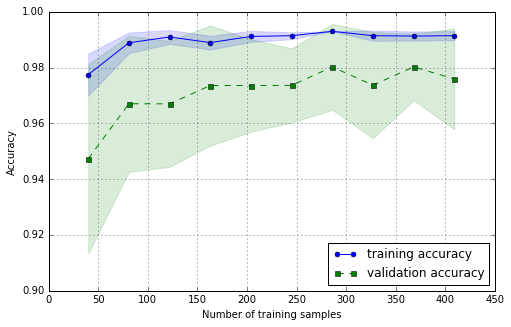

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 5) 
plt.rcParams['axes.titlesize'] = 'large'


plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
          label='training accuracy')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.show()

### Results
As we can see in the abover learning curve plot, our model performs quite well on the test dataset. However, it may be slightly overfitting the training data indicated by a relatively small, but visible, gap between the training and cross-validation accuracy curves.

### Addressing overfitting and underfitting with validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters, for example, the inverse regularization parameter C in logistic regression. Let's go ahead and see how we create validation curves via sckit-learn:

In [17]:
from sklearn.learning_curve import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
               estimator=pipe_lr, 
                 X=X_train, 
               y=y_train, 
               param_name='clf__C', 
              param_range=param_range,
                cv=10)

/home/ubuntu/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/.local/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [18]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

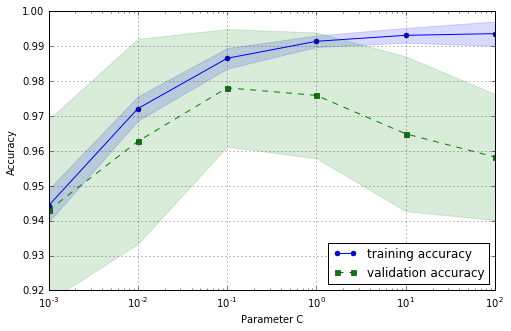

In [19]:
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(param_range, 
                  test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.92, 1.0])
plt.show() 

### Results
Similar to the learning curve example in the previous section, we plotted the average training and cross-validation accuracies and the corresponding standard deviations.

Although the differences in the accuracy for varying values of C are subtle, we can see that the model slightly underfits the data when we increase the regularization strength (small values of C). However, for large values of C, it means lowering the strength of regularization, so the model tends to slightly overfit the data. In this case, the sweet spot appears to be around C=0.1.

### Fine Tuning ML models using  grid search

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range, 
                'clf__kernel': ['linear']},
               {'clf__C': param_range, 
                'clf__gamma': param_range, 
                'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                   param_grid=param_grid, 
                   scoring='accuracy', 
                   cv=10,
                   n_jobs=-1)
gs = gs.fit(X_train, y_train)
print("Best: %f using %s" % (gs.best_score_, gs.best_params_))
#for params, mean_score, scores in gs.grid_scores_:
    #print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))



Best: 0.978022 using {'clf__C': 0.1, 'clf__kernel': 'linear'}


Using the above code, 
* we initialized a GridSearchCV object from the sklearn.grid_search module to train and tune a support vector machine (SVM) pipeline. 
* We set the param_grid parameter of GridSearchCV to a list of dictionaries to specify the parameters that we'd want to tune.
    * For the linear SVM, we only evaluated the inverse regularization parameter C; 
    * for the RBF kernel SVM, we tuned both the C and gamma parameter (gamma parameter is specific to kernel SVMs). 

After we used the training data to perform the grid search, we obtained the score of the best-performing model via the best_score_ attribute and looked at its parameters, that can be accessed via the best_params_ attribute. In this particular case, the linear SVM model with 'clf__C'= 0.1' yielded the best k-fold cross-validation accuracy: 97.8 %


In [22]:
#estimate the performance of the best selected mode
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.965


use the nested cross-validation approach to compare an SVM model to a simple decision tree classifier; for simplicity, we will only tune its depth parameter

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV( estimator=DecisionTreeClassifier(random_state=0),
       param_grid=[ {'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy', 
                  cv=5)

scores = cross_val_score(gs,X_train,  y_train, scoring='accuracy',cv=2)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.906 +/- 0.015


As we can see here, the nested cross-validation performance of the SVM model (97.8 percent) is notably better than the performance of the decision tree (90.8 percent). Thus, we'd expect that it might be the better choice for classifying new data that comes from the same population as this particular dataset.

### Performance Evaluation
model accuracy, is a useful metric to quantify the performance of a model in general. However, there are several other performance metrics that can be used to measure a model's relevance, such as precision, recall, and the F1-score.

#### Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


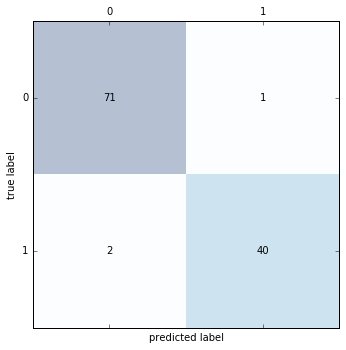

In [30]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j], 
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

class 1 (malignant) is the positive class and class 0(Benign)
* Model classified 71 of the samples to belong to calss 0(true negatives) and 40 samples that belong to class 1(true positives) respectively. 
* Model misclassified 1 sample as a from class 0 as class 1 (false positive) and it predicted 2 samples as benign (class 0) although it is a malignant tumor (false negatives)
In the next section, we will learn how we can use this information to calculate various different error metrics.

Confusion matrix gives you a more compplete picture of how well your classier is performing and allows you to compute various calassification metrics and these metrics can guide your model selction

### Optimizing precision and recall parameters of a classification model
Both the prediction error (ERR) and accuracy (ACC) provide general information about how many samples are misclassified. 
* Error is the sum of all false predictions divided by the number of total predictions,
*  Accuracy is calculated as the sum of correct predictions divided by the total number of predictions.

The true positive rate (TPR) and false positive rate (FPR) are performance metrics that are especially useful for imbalanced class problems:

Precision (PRE) and recall (REC) are performance metrics that are related to those true positive and true negative rates, and in fact, recall is synonymous to the true positive rate:

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
#print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))
#print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
#print('Recall: %.3f' % recall_score( y_true=y_test, y_pred=y_pred))
#print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.973684210526
[[71  1]
 [ 2 40]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98        72
          1       0.98      0.95      0.96        42

avg / total       0.97      0.97      0.97       114



### Plotting a receiver operating characteristic
Receiver operator characteristic (ROC) graphs are useful tools for selecting models for classification based on their performance with respect to the false positive and true positive rates, which are computed by shifting the decision threshold of the classifier. 

The diagonal of an ROC graph can be interpreted as random guessing, and classification models that fall below the diagonal are considered as worse than random guessing. A perfect classifier would fall into the top-left corner of the graph with a true positive rate of 1 and a false positive rate of 0. 
>Based on the ROC curve, we can then compute the so-called area under the curve (AUC) to characterize the performance of a classification model.

##### Next plot an ROC curve of a classifier that only uses two features from the Breast Cancer Wisconsin dataset to predict whether a tumor is benign or malignant.

In [42]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2',
                                               random_state=0,
                                               C=100.0))])

X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train, y_train))

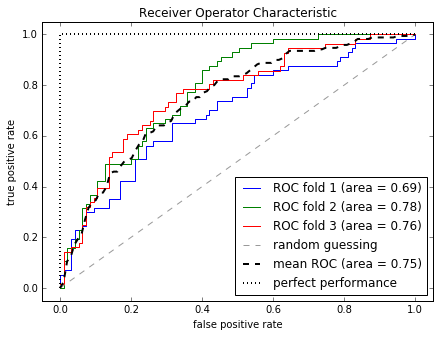

In [52]:
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i + 1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

# plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()



In [45]:
pipe_lr = pipe_lr.fit(X_train2, y_train)
y_pred2 = pipe_lr.predict(X_test[:, [4, 14]])

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
print('ROC AUC: %.3f' % roc_auc_score( y_true=y_test, y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score( y_true=y_test, y_pred=y_pred2))


ROC AUC: 0.662
Accuracy: 0.711
